<div style="align: center; margin: 0; padding: 0; height: 250px;">
    <br>
    <img src="https://storage.googleapis.com/kaggle-datasets-images/5227/7876/3d18388d350d2791f4121a232acce097/dataset-cover.jpg" style="display:block; margin:auto; width:65%; height:100%;">
</div><br><br>

<div style="letter-spacing:normal; opacity:1.;">
<!--   https://xkcd.com/color/rgb/   -->
  <p style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; 
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>Car Price Dataset</strong></p>  
            
  <p style="text-align:center; background-color:romance; color: Jaguar; border-radius:10px; font-family:monospace; 
            line-height:1.4; font-size:22px; font-weight:normal; text-transform: capitalize; padding: 5px;"
     >Machine Learning Module: Car price Dataset Classification and Regression<br><br></p>
    
  <div style="align: center;">
  <table style="text-align: center; background-color: romance; color: Jaguar; border-radius: 10px; font-family: monospace;
                  line-height:1.4; font-size: 21px; font-weight: normal; text-transform: capitalize; padding: 5px; 
                  margin: 0 auto;">
    <tr><td style="text-align: left; padding-left: 0px;"
            > Logistic Regression Model Training <span style="font-size: 16px;"> </span></td></tr>
    <tr><td style="text-align: left; padding-left: 0px;"
            > Ridge Regression Model Training <span style="font-size: 16px;"> </span></td></tr>
  </table>
  </div>

</div>

**Dataset Info**

> 

**About Dataset**

In this homework, we will use the Car price dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
```

We'll keep working with the `MSRP` variable, and we'll transform it to a classification task. 

**Features**

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`,
* `MSRP`

[Download Data](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv)

**TASK**

**Homework**

> Note: sometimes your answer doesn't match one of the options exactly. That's fine.

Select the option that's closest to your solution.


**Submit the results**

* Submit your results here: https://forms.gle/FFfNjEP4jU4rxnL26
* You can submit your solution multiple times. In this case, only the last submission will be used 
* If your answer doesn't match options exactly, select the closest one


**Deadline**

The deadline for submitting is 2 October (Monday), 23:00 CEST.

After that, the form will be closed.

<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>1. Import Libraries & Ingest Data</strong></h1>   
</div>

> ⚠️ Not Recommended conda `base` env, work on `venv`

- https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf

**You must use the `--no-deps` option in the pip install command in order to avoid bundling dependencies into your conda-package.**

If you run pip install without the `--no-deps` option, pip will often install dependencies in your conda recipe and those dependencies will become part of your package. <br>
This wastes space in the package and `increases the risk of file overlap`, file clobbering, and broken packages.

There might be cases where you want to install a package directly from a local directory or a specific location, without relying on the package indexes.<br>
In such situations, you can use the `--no-index` option to tell pip not to look for the package in any indexes.

```py
# new conda virtual environment
conda create --name "classifier" python=3.10 jupyter -y
conda activate "classifier"

# if The environment is inconsistent, try below
conda update -n base -c defaults conda --force-reinstall
conda install anaconda --force-reinstall

# get dependencies
pip freeze > requirements.txt
conda list -e > requirements.txt

# install all package dependencies
pip install -r requirements.txt
conda install -c conda-forge pandas==2.0.2 -q -y
```

In [1]:
!python -V

Python 3.10.13


In [2]:
# !pip install jupyter ipykernel ipywidgets
# !pip install pyarrow fastparquet orjson pandas matplotlib seaborn
# !pip install scikit-learn xgboost optuna hyperopt
# !pip install tqdm requests
# !pip install pipenv

In [3]:
%%writefile requirements.txt 
# To get started with MLflow you'll need to install the appropriate Python package.

# for parquet file
pyarrow
fastparquet
# orjson is a fast, correct JSON library
orjson
numpy
pandas
matplotlib
seaborn
scipy
tqdm
joblib

# ML Model packages
scikit-learn
xgboost
optuna
hyperopt

# Optionally
jupyter
ipykernel
ipywidgets
pipenv

Overwriting requirements.txt


In [4]:
import os, sys, platform, IPython.display

# pip install --no-deps --no-index --force-reinstall --no-cache-dir --user
# !{sys.executable} -m pip install -Uq -r requirements.txt --no-cache-dir --user
# !jupyter nbextension enable --py widgetsnbextension

# IPython.display.clear_output()
print("Python  :", sys.version)
print("Platform:", platform.system(), platform.platform())
print("Actv Env:", os.getenv('CONDA_DEFAULT_ENV', 'Not Found Conda Env'))

Python  : 3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:24:38) [MSC v.1916 64 bit (AMD64)]
Platform: Windows Windows-10-10.0.22621-SP0
Actv Env: classifier


In [5]:
import warnings
# Filter out FutureWarnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.filterwarnings(action="ignore", message="FutureWarning: is_categorical_dtype*")
# warnings.filterwarnings(action="ignore", module="seaborn")

In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import ElasticNet, Lasso, LassoCV, Ridge, RidgeCV
# from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.model_selection import GridSearchCV

import xgboost as xgb
import optuna

import os
import sys
# import pickle
# import click
from glob import glob
# Import joblib for model persistence
# from joblib import load, dump

# memory management performs garbage collection 
import gc
gc.collect()

0

In [7]:
# !pip install session_info
import session_info
session_info.show(html=False)

-----
matplotlib          3.7.2
numpy               1.25.2
optuna              3.3.0
pandas              2.1.0
scipy               1.11.3
seaborn             0.13.0
session_info        1.0.0
sklearn             1.3.0
xgboost             2.0.0
-----
IPython             8.15.0
jupyter_client      7.4.9
jupyter_core        5.3.0
jupyterlab          3.6.3
notebook            6.5.4
-----
Python 3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:24:38) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.22621-SP0
-----
Session information updated at 2023-10-03 05:27


In [8]:
import os
# Get the current working directory
# current_dir = os.getcwd()

# Create a new directory for storing data
# os.makedirs('./data', exist_ok=True)
# os.makedirs('./pycode', exist_ok=True)
os.makedirs('./output', exist_ok=True)
os.makedirs('./model', exist_ok=True)

<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>2. Recognizing and Understanding Data</strong></h1>   
</div>

## Downloading the data

Car price dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
```

### Ingest Data [wget](https://linuxways.net/centos/linux-wget-command-with-examples/) or [curl](https://daniel.haxx.se/blog/2020/09/10/store-the-curl-output-over-there/)

In [9]:
# Download the data
!curl -s -O --create-dirs --output-dir "./data" https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

In [11]:
# Read the data for (May 2023)
# Specify the ZIP file path
csv_filename = 'data.csv'
csv_filepath = f'data/{csv_filename}'

# Read the extracted CSV file
df = pd.read_csv(csv_filepath, low_memory=False)

In [12]:
print("Shape of DataFrame:", df.shape)
df.head(2)

Shape of DataFrame: (11914, 16)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


## Features

We'll keep working with the `MSRP` variable, and we'll transform it to a classification task.<br>
For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`,
* `MSRP`

In [13]:
columns = "Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP".split(',')
df = df[columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Vehicle Style      11914 non-null  object 
 7   highway MPG        11914 non-null  int64  
 8   city mpg           11914 non-null  int64  
 9   MSRP               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [15]:
df.describe()

,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,MSRP
count,11914.000000,11845.00000,11884.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,26.637485,19.733255,4.059474e+04
std,7.579740,109.19187,1.780559,8.863001,8.987798,6.010910e+04
min,1990.000000,55.00000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,22.000000,16.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,26.000000,18.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,30.000000,22.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,354.000000,137.000000,2.065902e+06


## Data preparation

- https://aeturrell.github.io/skimpy/

* Select only the features from above and transform their names using the next line:

  ```
  data.columns = data.columns.str.replace(' ', '_').str.lower()
  ```
* Fill in the missing values of the selected features with 0.

* Rename `MSRP` variable to `price`.

In [17]:
# !pip install skimpy
from skimpy import clean_columns
df = clean_columns(df)
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')

In [18]:
df.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [19]:
# Fill missing values in numeric features with 0
df = df.fillna(0)

In [20]:
# Rename 'MSRP' variable to 'price'
df = df.rename(columns={'msrp': 'price'})
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price'],
      dtype='object')

### Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

- `AUTOMATIC`
- `MANUAL`
- `AUTOMATED_MANUAL`
- `DIRECT_DRIVE`

In [21]:
df['transmission_type'].value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

In [22]:
df.transmission_type.mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- `engine_hp` and `year`
- `engine_hp` and `engine_cylinders`
- `highway_mpg` and `engine_cylinders`
- `highway_mpg` and `city_mpg`

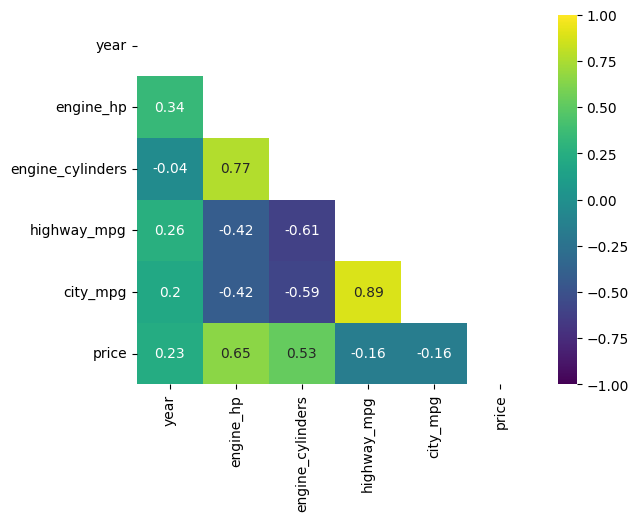

In [23]:
numerical = df.select_dtypes('number').columns

# Feature Importance: Correlation
sns.heatmap(
    df[numerical].corr().round(2), 
    mask=np.triu(np.ones_like(df[numerical].corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1, cmap='viridis'
)
plt.show();

In [24]:
df[numerical].corrwith(df['city_mpg']).sort_values(key=abs, ascending=False)

city_mpg            1.000000
highway_mpg         0.886829
engine_cylinders   -0.587306
engine_hp          -0.424918
year                0.198171
price              -0.157676
dtype: float64

In [25]:
# Finding the two features with the biggest correlation
max_corr = df[numerical].corr()[df[numerical].corr()<1].unstack().sort_values(key=abs, ascending=False).head(1).round(2)
max_corr

highway_mpg  city_mpg    0.89
dtype: float64

### Make `price` binary

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.

In [26]:
# Calculate the mean of the 'price' column
price_mean = df['price'].mean()

# Create the 'above_average' column with 1 if price > mean, else 0
df['above_average'] = (df['price'] > price_mean).astype(int)
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price', 'above_average'],
      dtype='object')

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`above_average`) is not in your dataframe.

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Split the data
# Assuming 'df' is your DataFrame and 'above_average' is the target column
X = df.drop(columns=['above_average', 'price'])  # Features (exclude the target)
y = df['above_average']  # Target variable

# Split the data into train, validation, and test sets (60%/20%/20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shapes of the resulting sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Val set shape  :", X_val.shape, y_val.shape)
print("Test set shape :", X_test.shape, y_test.shape)


Train set shape: (7148, 9) (7148,)
Val set shape  : (2383, 9) (2383,)
Test set shape : (2383, 9) (2383,)


### Question 3

* Calculate the mutual information score between `above_average` and other categorical variables in our dataset. 
  Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?
  
- `make`
- `model`
- `transmission_type`
- `vehicle_style`

In [28]:
# Feature Importance: Mutual Information
from sklearn.metrics import mutual_info_score

# Select categorical columns
cat = df.select_dtypes('O').columns

def mutual_information(data:pd.Series, y=y_train):
    return round(mutual_info_score(data, y), 2)

# Calculate mutual information scores
X_train[cat].apply(mutual_information).sort_values()

transmission_type    0.02
vehicle_style        0.08
make                 0.24
model                0.46
dtype: float64

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.60
- 0.72
- 0.84
- 0.95

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


def model_building(df):    
    # Select categorical columns
    cat = df.select_dtypes('O').columns

    # Create a preprocessor to handle categorical columns with one-hot encoding
    preprocessor = make_column_transformer(
        (OneHotEncoder(handle_unknown='ignore', sparse_output=True), cat),
        remainder = 'passthrough'
        )

    # Create a logistic regression model
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42))
    ])
    return model

# Create a model
model = model_building(X_train)

# Fit the model on the training dataset
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'transmission_type', 'vehicle_style'], dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=10, max_iter=1000, random_state=42,
                                    solver='liblinear'))])

In [30]:
from sklearn.metrics import accuracy_score

# Predict on the validation dataset
y_val_pred = model.predict(X_val)

# Calculate accuracy on the validation dataset
accuracy = round(accuracy_score(y_val, y_val_pred), 2)
accuracy

0.95

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `year`
- `engine_hp`
- `transmission_type`
- `city_mpg`

> **Note**: the difference doesn't have to be positive

In [31]:
from sklearn.metrics import accuracy_score

# Initialize a dictionary to store the differences
differences = {}

# Loop through each feature and exclude it
for feature in X_train.columns:
    train = X_train.drop(columns=[feature])
    val = X_val.drop(columns=[feature])

    # Initialize a model
    model = model_building(train)
    
    # Train a model without the current feature
    model.fit(train, y_train)
    
    # Predict on the validation dataset
    y_val_pred = model.predict(val)    
    
    # Calculate accuracy
    accuracy_excluded = accuracy_score(y_val, y_val_pred)
    
    # Calculate the difference in accuracy, Store the difference in the dictionary
    differences[feature] = accuracy - accuracy_excluded

# Find the feature with the smallest difference
smallest_difference_feature = min(differences, key=differences.get)
smallest_difference_feature

'year'

In [33]:
differences

{'make': 0.01294586655476282,
 'model': 0.03015107007973139,
 'year': 0.0020352496852705793,
 'engine_hp': 0.015883340327318418,
 'engine_cylinders': 0.004972723457826178,
 'transmission_type': 0.007070919009651622,
 'vehicle_style': 0.029731430969366257,
 'highway_mpg': 0.01000839278220722,
 'city_mpg': 0.007070919009651622}

### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver `'sag'`. Set the seed to `42`.
* This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
* Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

- 0
- 0.01
- 0.1
- 1
- 10

> **Note**: If there are multiple options, select the smallest `alpha`.

In [34]:
# Apply logarithmic transformation to 'price'
y_train_log = np.log1p(df.loc[X_train.index, 'price'])
y_val_log = np.log1p(df.loc[X_val.index, 'price'])
y_test_log = np.log1p(df.loc[X_test.index, 'price'])

In [35]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [62]:
def model_building(params):
    # Select categorical columns
    cat = X_train.select_dtypes('O').columns

    # Create a preprocessor to handle categorical columns with one-hot encoding
    preprocessor = make_column_transformer(
        (OneHotEncoder(handle_unknown='ignore', sparse_output=True), cat),
        remainder = 'passthrough'
        )

    # Create a Ridge regression model
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', Ridge(**params))
    ])
    return model

# Create a model
model_building({'alpha': 0.1})

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'transmission_type', 'vehicle_style'], dtype='object'))])),
                ('classifier', Ridge(alpha=0.1))])

In [66]:
def objective(trial):
    # Define hyperparameters to optimize
    params = {
        # 'alpha': trial.suggest_float(name='alpha', low=1e-2, high=1e2, step=None, log=False),
        'alpha': trial.suggest_categorical(name='alpha', choices=[0, 0.01, 0.1, 1, 10]),
        'solver': 'sag',
        'max_iter': 99999,
        'random_state': 42,
    }

    # Create and train RandomForestRegressor with suggested hyperparameters
    lin_reg = model_building(params)
    lin_reg.fit(X_train, y_train_log)

    # Make predictions on validation data and calculate RMSE
    y_pred = lin_reg.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return rmse

In [67]:
# Set the number of trials for optimization
num_trials=15

def optimize_hyperparameters(num_trials):
    # Configure the sampler and create a study
    sampler = optuna.samplers.TPESampler(seed=42)
    study = optuna.create_study(direction="minimize", sampler=sampler)

    # Optimize the study
    study.optimize(objective, n_trials=num_trials, show_progress_bar=True)    
    return study

study = optimize_hyperparameters(num_trials)

[I 2023-10-03 05:19:56,232] A new study created in memory with name: no-name-6d05e596-b59a-4f12-8306-7aff612666cb


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2023-10-03 05:19:56,344] Trial 0 finished with value: 9.887084302542057 and parameters: {'alpha': 0.01}. Best is trial 0 with value: 9.887084302542057.
[I 2023-10-03 05:19:56,433] Trial 1 finished with value: 9.888453709826537 and parameters: {'alpha': 0.1}. Best is trial 0 with value: 9.887084302542057.
[I 2023-10-03 05:19:56,528] Trial 2 finished with value: 9.887084302542057 and parameters: {'alpha': 0.01}. Best is trial 0 with value: 9.887084302542057.
[I 2023-10-03 05:19:56,617] Trial 3 finished with value: 9.888453709826537 and parameters: {'alpha': 0.1}. Best is trial 0 with value: 9.887084302542057.
[I 2023-10-03 05:19:56,690] Trial 4 finished with value: 9.888390939095764 and parameters: {'alpha': 0}. Best is trial 0 with value: 9.887084302542057.
[I 2023-10-03 05:19:56,791] Trial 5 finished with value: 9.888390939095764 and parameters: {'alpha': 0}. Best is trial 0 with value: 9.887084302542057.
[I 2023-10-03 05:19:56,933] Trial 6 finished with value: 9.892806510074738 and

In [68]:
# Get the best trial and its parameters
best_trial = study.best_trial
best_params = best_trial.params
best_value = best_trial.value
print(f"Best Parameters: {best_params}")
print(f"Best RMSE Value: {best_value:.2f}")

Best Parameters: {'alpha': 0.01}
Best RMSE Value: 9.89


## End of Project